哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [163]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
data1 = pd.read_csv(r'A_lvr_land_A.csv')
data2 = pd.read_csv(r'B_lvr_land_A.csv')
data3 = pd.read_csv(r'E_lvr_land_A.csv')
data4 = pd.read_csv(r'F_lvr_land_A.csv')

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [164]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
data1 = data1.iloc[1:,:]
data2 = data2.iloc[1:,:]
data3 = data3.iloc[1:,:]
data4 = data4.iloc[1:,:]

In [165]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
data1['city'] = 'Taipei'
data2['city'] = 'Taichung'
data3['city'] = 'Kaohsiung'
data4['city'] = 'New_Taipei'

In [183]:
#4. 將以上四份資料運用pd.concat()串接
data = pd.concat([data1,data2,data3,data4],axis = 0)

In [184]:
data = data.reset_index()

In [185]:
del data['index']

In [186]:
data

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
3,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
4,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59471,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,New_Taipei
59472,三峽區,土地,成福段成福小段331~360地號,762,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,New_Taipei
59473,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,New_Taipei
59474,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,New_Taipei


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [170]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [209]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
data1 = data.rename(columns_mapping, axis = 'columns')

In [218]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
data1 = data1.loc[:,['towns','use_zoning','tx_dt','main_use','building_area_square_meter','total_price','unit_price',
                    'room_number', 'hall_number','health_number','main_building_area','city']]
data1 = data1[(data1['main_use'] == '住家用') & (data1['use_zoning'] == '住')]

In [220]:
data1 = data1.dropna()

In [221]:
data1.reset_index(inplace =True)

In [222]:
data1

,index,towns,use_zoning,tx_dt,main_use,building_area_square_meter,total_price,unit_price,room_number,hall_number,health_number,main_building_area,city
0,0,文山區,住,1090406,住家用,229.91,36000000,156583,3,2,2,110.91,Taipei
1,1,文山區,住,1090317,住家用,37.31,5580000,149558,2,1,1,24.58,Taipei
2,4,文山區,住,1090328,住家用,123.66,18280000,147825,3,2,2,98.74,Taipei
3,6,文山區,住,1090417,住家用,124.25,8000000,64386,3,1,2,90.78,Taipei
4,7,文山區,住,1090417,住家用,30.16,2200000,72944,5,2,2,26.15,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7797,48924,三重區,住,1090611,住家用,84.53,7280000,86123,5,0,5,75.34,New_Taipei
7798,49200,三重區,住,1090521,住家用,84.63,7350000,86849,4,0,4,84.63,New_Taipei
7799,49735,三重區,住,1090522,住家用,67.0,6000000,89552,1,1,1,67.00,New_Taipei
7800,49799,汐止區,住,1090507,住家用,124.31,11800000,94924,3,2,2,98.54,New_Taipei


In [223]:
del data1['index']

In [224]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
data1 = data1.astype(columns_type)

In [227]:
data1

,towns,use_zoning,tx_dt,main_use,building_area_square_meter,total_price,unit_price,room_number,hall_number,health_number,main_building_area,city
0,文山區,住,1090406,住家用,229.91,36000000,156583.0,3,2,2,110.91,Taipei
1,文山區,住,1090317,住家用,37.31,5580000,149558.0,2,1,1,24.58,Taipei
2,文山區,住,1090328,住家用,123.66,18280000,147825.0,3,2,2,98.74,Taipei
3,文山區,住,1090417,住家用,124.25,8000000,64386.0,3,1,2,90.78,Taipei
4,文山區,住,1090417,住家用,30.16,2200000,72944.0,5,2,2,26.15,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...
7797,三重區,住,1090611,住家用,84.53,7280000,86123.0,5,0,5,75.34,New_Taipei
7798,三重區,住,1090521,住家用,84.63,7350000,86849.0,4,0,4,84.63,New_Taipei
7799,三重區,住,1090522,住家用,67.00,6000000,89552.0,1,1,1,67.00,New_Taipei
7800,汐止區,住,1090507,住家用,124.31,11800000,94924.0,3,2,2,98.54,New_Taipei


In [228]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
data1 = data1[(data1['room_number']<=5)&(data1['room_number']>=1)]
data1 = data1[(data1['hall_number']<=2)&(data1['hall_number']>=1)]
data1['tx_dt_year'] =  data1['tx_dt']
data1 = data1.reset_index()
for i in range(len(data1)):
    try:
        data1['tx_dt_year'][i] = data1['tx_dt'][i][:3]
    except:
        continue

<ipython-input-228-0fd7c6a9b63a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['tx_dt_year'][i] = data1['tx_dt'][i][:3]


In [229]:
data1

,index,towns,use_zoning,tx_dt,main_use,building_area_square_meter,total_price,unit_price,room_number,hall_number,health_number,main_building_area,city,tx_dt_year
0,0,文山區,住,1090406,住家用,229.91,36000000,156583.0,3,2,2,110.91,Taipei,109
1,1,文山區,住,1090317,住家用,37.31,5580000,149558.0,2,1,1,24.58,Taipei,109
2,2,文山區,住,1090328,住家用,123.66,18280000,147825.0,3,2,2,98.74,Taipei,109
3,3,文山區,住,1090417,住家用,124.25,8000000,64386.0,3,1,2,90.78,Taipei,109
4,4,文山區,住,1090417,住家用,30.16,2200000,72944.0,5,2,2,26.15,Taipei,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984,7795,新店區,住,1090516,住家用,112.33,10500000,93475.0,3,2,2,93.18,New_Taipei,109
6985,7796,蘆洲區,住,1090529,住家用,92.14,9200000,99848.0,3,2,1,86.55,New_Taipei,109
6986,7799,三重區,住,1090522,住家用,67.00,6000000,89552.0,1,1,1,67.00,New_Taipei,109
6987,7800,汐止區,住,1090507,住家用,124.31,11800000,94924.0,3,2,2,98.54,New_Taipei,109


In [230]:
data1['tx_dt_year'] = data1['tx_dt_year'].astype(int)

In [232]:
data1 = data1[data1['tx_dt_year']==109]

# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [233]:
data1.columns

Index(['index', 'towns', 'use_zoning', 'tx_dt', 'main_use',
       'building_area_square_meter', 'total_price', 'unit_price',
       'room_number', 'hall_number', 'health_number', 'main_building_area',
       'city', 'tx_dt_year'],
      dtype='object')

In [234]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
data1['building_area_square_feet'] = data1['building_area_square_meter']*0.3025
data1['main_building_area_square_feet'] = data1['main_building_area']*0.3025
data1['unit_price_square_feet'] = data1['unit_price']*0.3025

<ipython-input-234-eb8f75bcab65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['building_area_square_feet'] = data1['building_area_square_meter']*0.3025
<ipython-input-234-eb8f75bcab65>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['main_building_area_square_feet'] = data1['main_building_area']*0.3025
<ipython-input-234-eb8f75bcab65>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [235]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
data1.describe()


,index,building_area_square_meter,total_price,unit_price,room_number,hall_number,health_number,main_building_area,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6894.000000,6894.000000,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.0,6894.000000,6894.000000,6894.000000
mean,3958.207137,121.712089,1.138712e+07,94364.671163,2.850885,1.793299,1.733536,82.086667,109.0,36.817907,24.831217,28545.313027
std,2247.588181,62.871712,1.159445e+07,58317.311227,0.898498,0.404969,0.681085,37.363166,0.0,19.018693,11.302358,17640.986646
min,0.000000,0.970000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,109.0,0.293425,0.000000,0.000000
25%,2012.250000,82.965000,5.580000e+06,53532.250000,2.000000,2.000000,1.000000,60.682500,109.0,25.096912,18.356456,16193.505625
50%,4003.500000,109.390000,8.550000e+06,79610.000000,3.000000,2.000000,2.000000,78.990000,109.0,33.090475,23.894475,24082.025000
75%,5902.750000,147.517500,1.329500e+07,118728.250000,3.000000,2.000000,2.000000,95.797500,109.0,44.624044,28.978744,35915.295625
max,7801.000000,1444.950000,2.250000e+08,610104.000000,5.000000,2.000000,6.000000,335.760000,109.0,437.097375,101.567400,184556.460000


價格0塊的資訊很奇怪 先刪除

In [240]:
data1 = data1[data1['total_price']>0]
data1 = data1[data1['unit_price_square_feet']>0]
data1 = data1[data1['main_building_area_square_feet']>0]

In [241]:
data1.describe()

,index,building_area_square_meter,total_price,unit_price,room_number,hall_number,health_number,main_building_area,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6854.000000,6854.000000,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.0,6854.000000,6854.000000,6854.000000
mean,3957.022760,121.768404,1.141669e+07,94548.453020,2.849869,1.793114,1.733149,82.565725,109.0,36.834942,24.976132,28600.907039
std,2251.758525,62.849105,1.161669e+07,58374.690321,0.898343,0.405103,0.680869,36.940424,0.0,19.011854,11.174478,17658.343822
min,0.000000,7.440000,4.100000e+05,3239.000000,1.000000,1.000000,0.000000,7.440000,109.0,2.250600,2.250600,979.797500
25%,2004.250000,83.012500,5.600000e+06,53597.250000,2.000000,2.000000,1.000000,61.062500,109.0,25.111281,18.471406,16213.168125
50%,3992.500000,109.405000,8.600000e+06,79742.500000,3.000000,2.000000,2.000000,79.110000,109.0,33.095012,23.930775,24122.106250
75%,5908.750000,147.445000,1.330000e+07,118880.000000,3.000000,2.000000,2.000000,95.970000,109.0,44.602112,29.030925,35961.200000
max,7801.000000,1444.950000,2.250000e+08,610104.000000,5.000000,2.000000,6.000000,335.760000,109.0,437.097375,101.567400,184556.460000


In [ ]:
# 移除後再用.describe()觀察是否還有奇怪的資料?



# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [242]:
Taipei = data1[data1['city'] == 'Taipei']

In [244]:
# 畫圖套件 熱圖
import seaborn as sns # 另一個繪圖-樣式套件
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
# 匯入分位數回歸

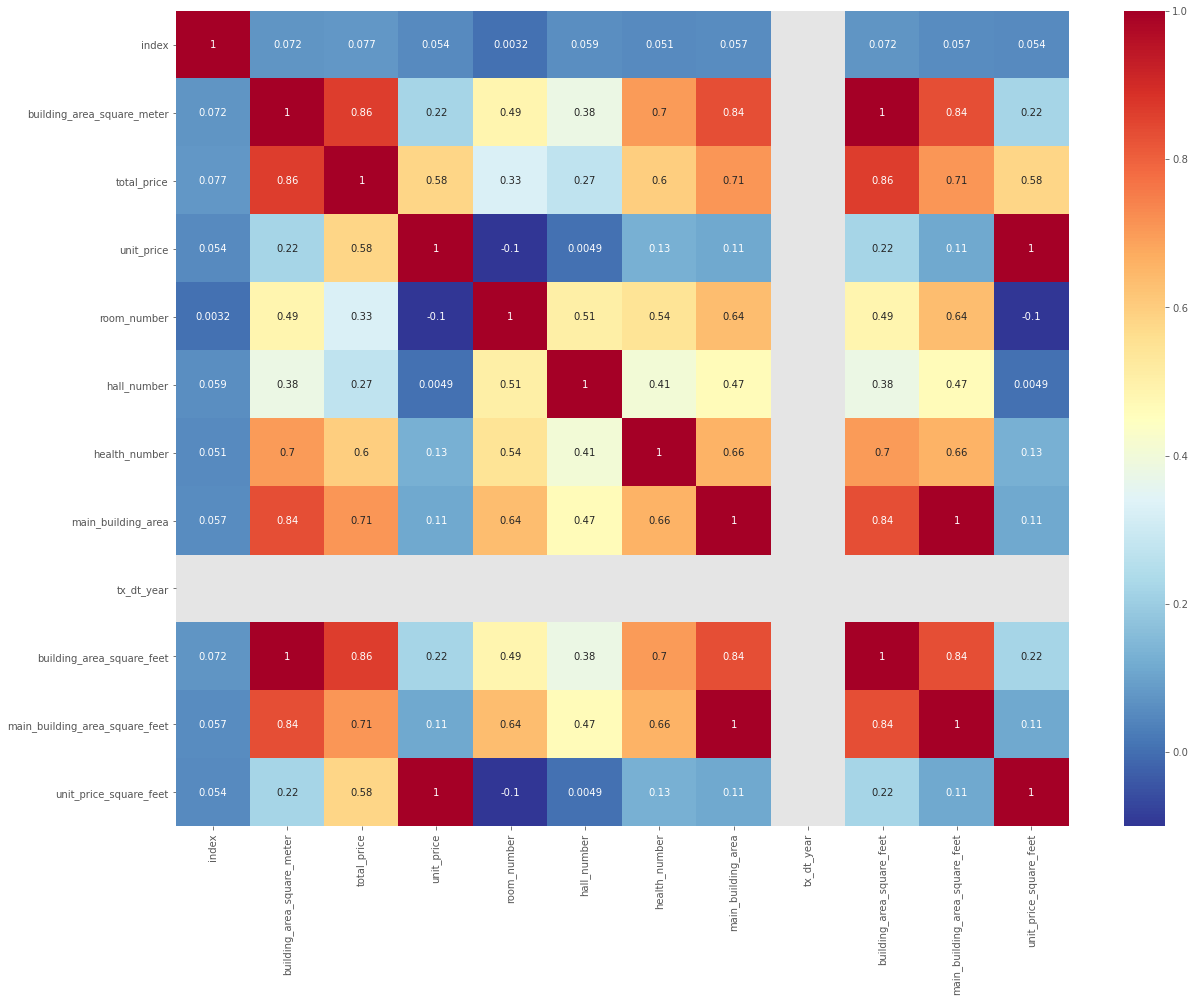

In [245]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
corrs = Taipei.corr()
plt.figure(figsize = (20, 15))
# 繪製相關係數 (correlations) 的 Heatmap
'''
參數解釋
cmap：matplotlib的colormap名称或颜色对象；如果没有提供，默认为cubehelix map (数据集为连续数据集时) 或 RdBu_r (数据集为离散数据集时)
vmax,vmin, 图例中最大值和最小值的显示值，没有该参数时默认不显示
当annot为True时，在heatmap中每个方格写入数据
'''
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, annot = True)
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數


以相關係數>0.7作為高度相關的基準

可以看到與總價有高度相關的變數為:building_area_square_meter, 
main_building_area,building_area_square_feet,main_building_area_square_feet

單價則沒有

# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

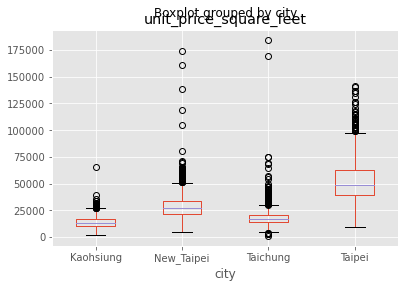

In [254]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
data1.boxplot(column = 'unit_price_square_feet', by = 'city')

由箱型圖可以看到Taipei的中位數為最高

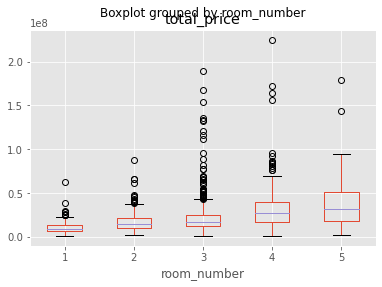

In [255]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
Taipei.boxplot(column = 'total_price', by = 'room_number')

5房的房價中位數最高

In [257]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(Taipei['towns'].values)
Taipei['towns2'] = le.transform(Taipei['towns'].values)

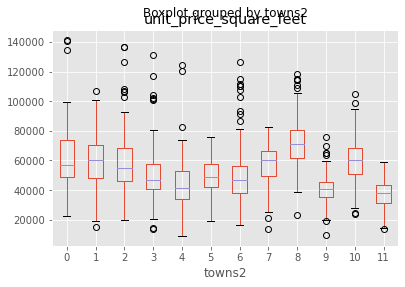

In [267]:
Taipei.boxplot(column = 'unit_price_square_feet', by = 'towns2')

In [265]:
le.inverse_transform([8]) # 大安區的房價中位數最高

array(['大安區'], dtype=object)